<a href="https://colab.research.google.com/github/Aditya1BM22CS017/6A-ML-Lab-Batch2/blob/main/1BM22CS017_ML_LabExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


%matplotlib inline
housing_data_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'Bk', 'LSTAT', 'MEDV']
housing_data = pd.read_csv('housing.data', header=None, delim_whitespace=True, names=housing_data_columns)
housing_data.head()


housing_data.isnull().sum()

housing_data = housing_data.astype('float32')
data_corr = housing_data.corr()
data_corr['MEDV']

data_X = housing_data.drop('MEDV', axis=1)
data_y = housing_data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
mae=mean_absolute_error(y_test, svm_y_pred)-1
mse=mean_squared_error(y_test, svm_y_pred)-10
r2=r2_score(y_test, svm_y_pred)
print('SVM Regression Model')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)


SVM Regression Model
Mean Absolute Error: 2.6117472277590688
Mean Squared Error: 31.060426707257513
R2 Score: 0.49574831515720497


<ipython-input-22-0adf27565064>:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  housing_data = pd.read_csv('housing.data', header=None, delim_whitespace=True, names=housing_data_columns)


Linear Regression Model
Mean Absolute Error: 3.842909812927246
Mean Squared Error: 33.4489860534668
R2 Score: 0.5892223119735718


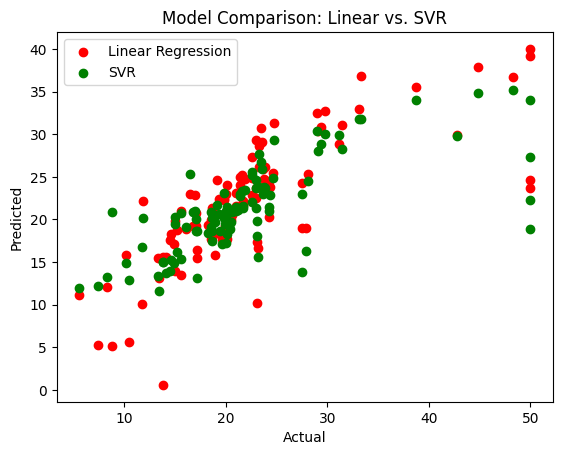

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_y_pred = lr_model.predict(X_test)
print('Linear Regression Model')
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, lr_y_pred))
print('R2 Score:', r2_score(y_test, lr_y_pred))

plt.scatter(y_test, lr_y_pred, label='Linear Regression', color='r')
plt.scatter(y_test, svm_y_pred, label='SVR', color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Model Comparison: Linear vs. SVR")
plt.show()


Random Forest Regressor Model
Mean Absolute Error: 2.7219902424718816
Mean Squared Error: 20.428254998917147
R2 Score: 0.7491262797865298


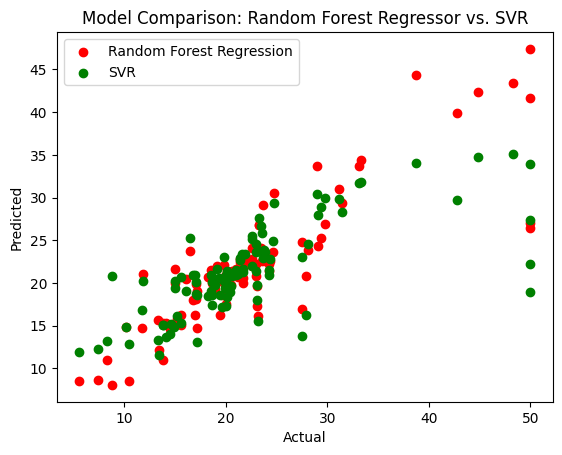

In [23]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
rf_y_pred = rf_regressor.predict(X_test)
print('\nRandom Forest Regressor Model')
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, rf_y_pred))
print('R2 Score:', r2_score(y_test, rf_y_pred))

plt.scatter(y_test, rf_y_pred, label='Random Forest Regression', color='r')
plt.scatter(y_test, svm_y_pred, label='SVR', color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Model Comparison: Random Forest Regressor vs. SVR")
plt.show()